In [2]:
import pandas as pd
import numpy as np

In [3]:
# reading the dataset
df = pd.read_csv("E:\BharatIntern\Bharat_Intern_MachineLearning_Tasks\Iris_classification\Iris.csv")
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Dell\AppData\Local\Temp\ipykernel_9440\3823043368.py:2: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv("E:\BharatIntern\Bharat_Intern_MachineLearning_Tasks\Iris_classification\Iris.csv")


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# Id is not required in training the model hence dropping ID column
df.drop("Id", axis="columns", inplace=True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# checking for duplicate values
df.duplicated().sum()

3

In [11]:
# removing duplicate values
df = df.drop_duplicates()

In [12]:
df.shape

(147, 5)

In [13]:
# cross verifying
df.duplicated().sum()

0

In [14]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
# giving numerical values to species column
df["Species"] = df["Species"].replace({
    "Iris-setosa" : 1,
    "Iris-versicolor" : 2,
    "Iris-virginica" : 3
})

C:\Users\Dell\AppData\Local\Temp\ipykernel_9440\3373845504.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Species"] = df["Species"].replace({


In [16]:
pd.set_option('future.no_silent_downcasting', True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [17]:
# removing outliers if any
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_outliers_removed = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
df.shape

(147, 5)

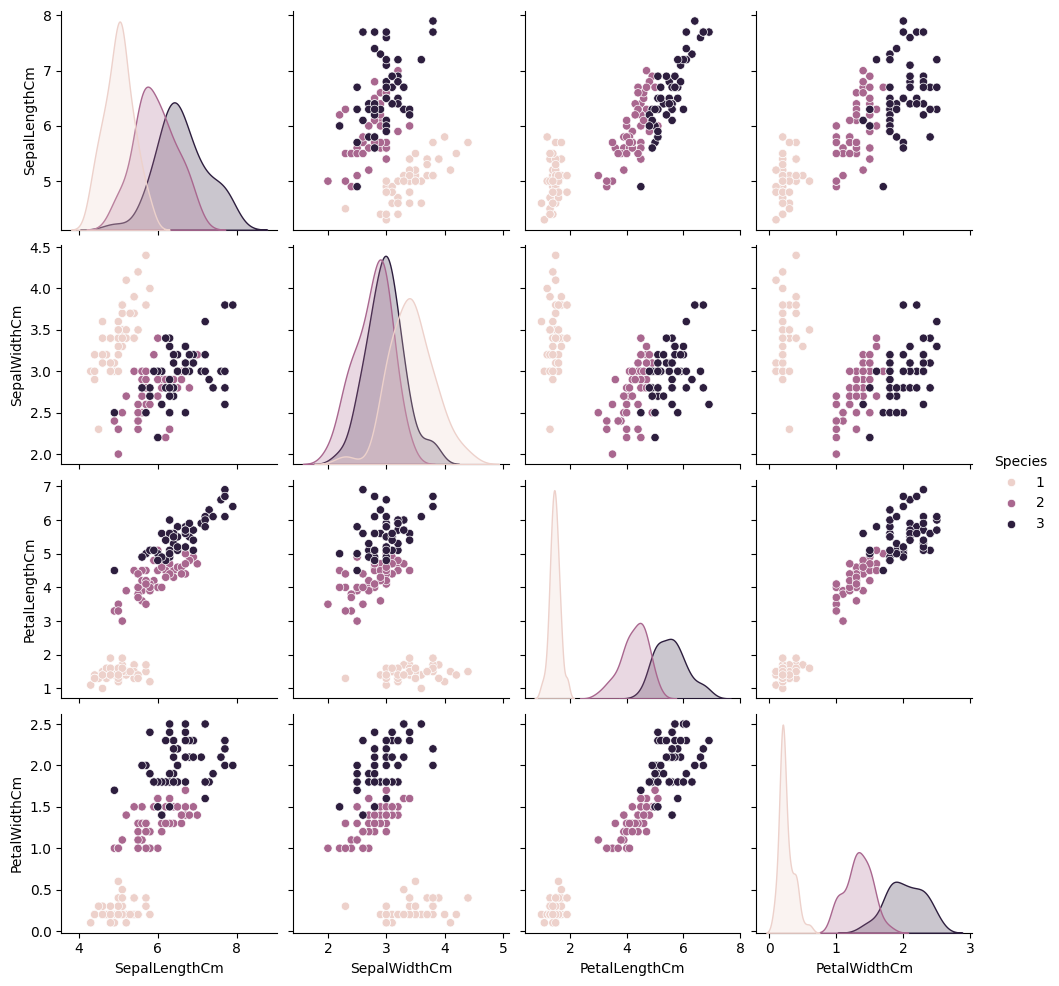

In [20]:
# Now visualiztion of the dataset
# making of pair plot to see pairwise relation between features
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, hue="Species", diag_kind="kde")
plt.show()

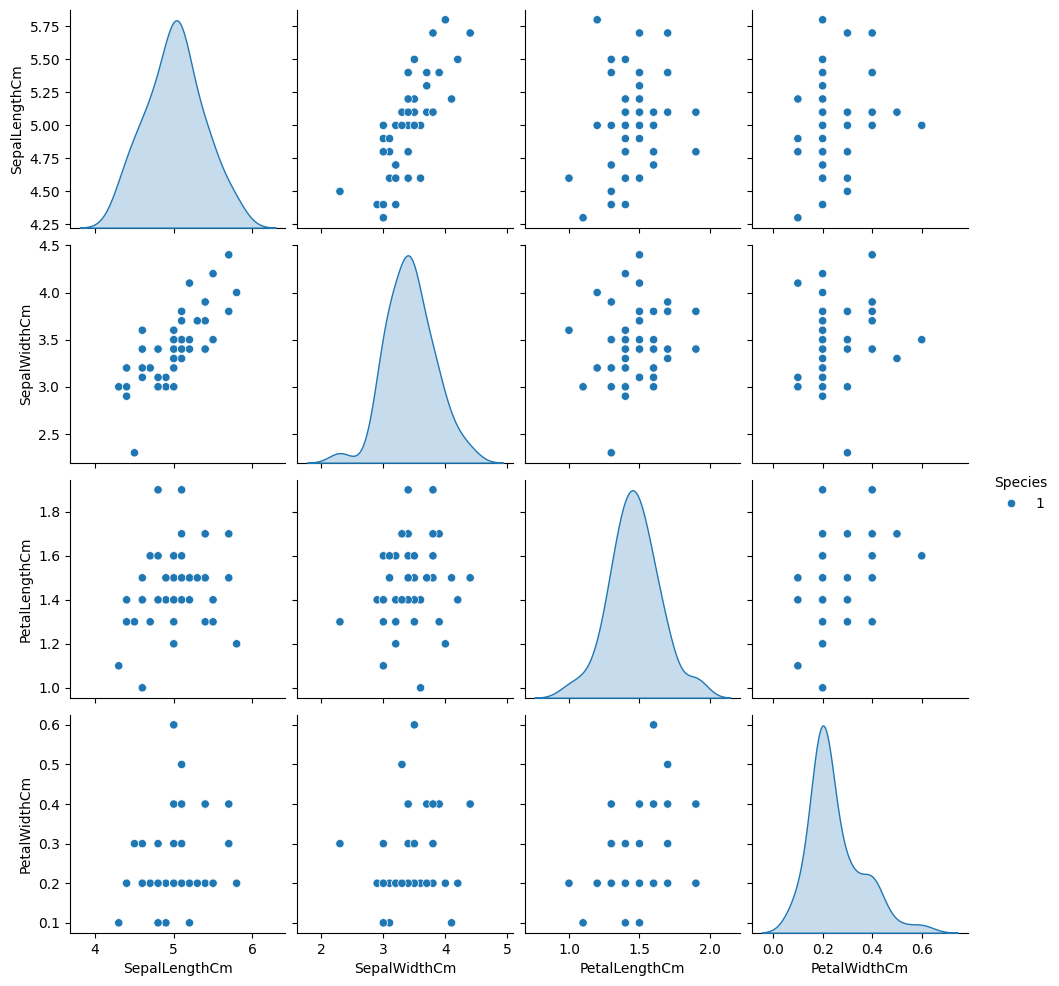

In [23]:
sns.pairplot(df[df["Species"]==1], hue="Species", diag_kind="kde")
plt.show()

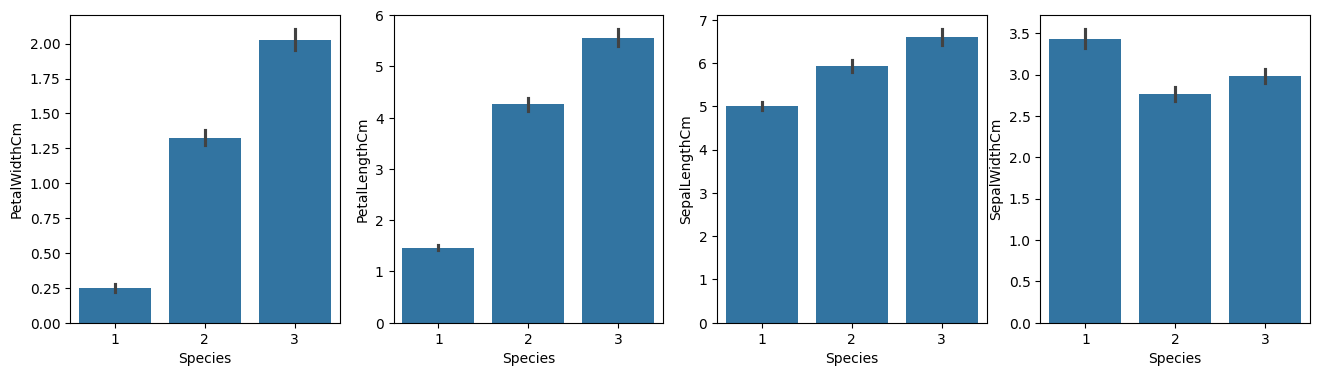

In [34]:
plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
sns.barplot(x="Species",y="PetalWidthCm",data=df)

plt.subplot(1,4,2)
sns.barplot(df,x="Species",y="PetalLengthCm")

plt.subplot(1,4,3)
sns.barplot(df,x="Species",y="SepalLengthCm")

plt.subplot(1,4,4)
sns.barplot(df,x="Species",y="SepalWidthCm")
plt.show()

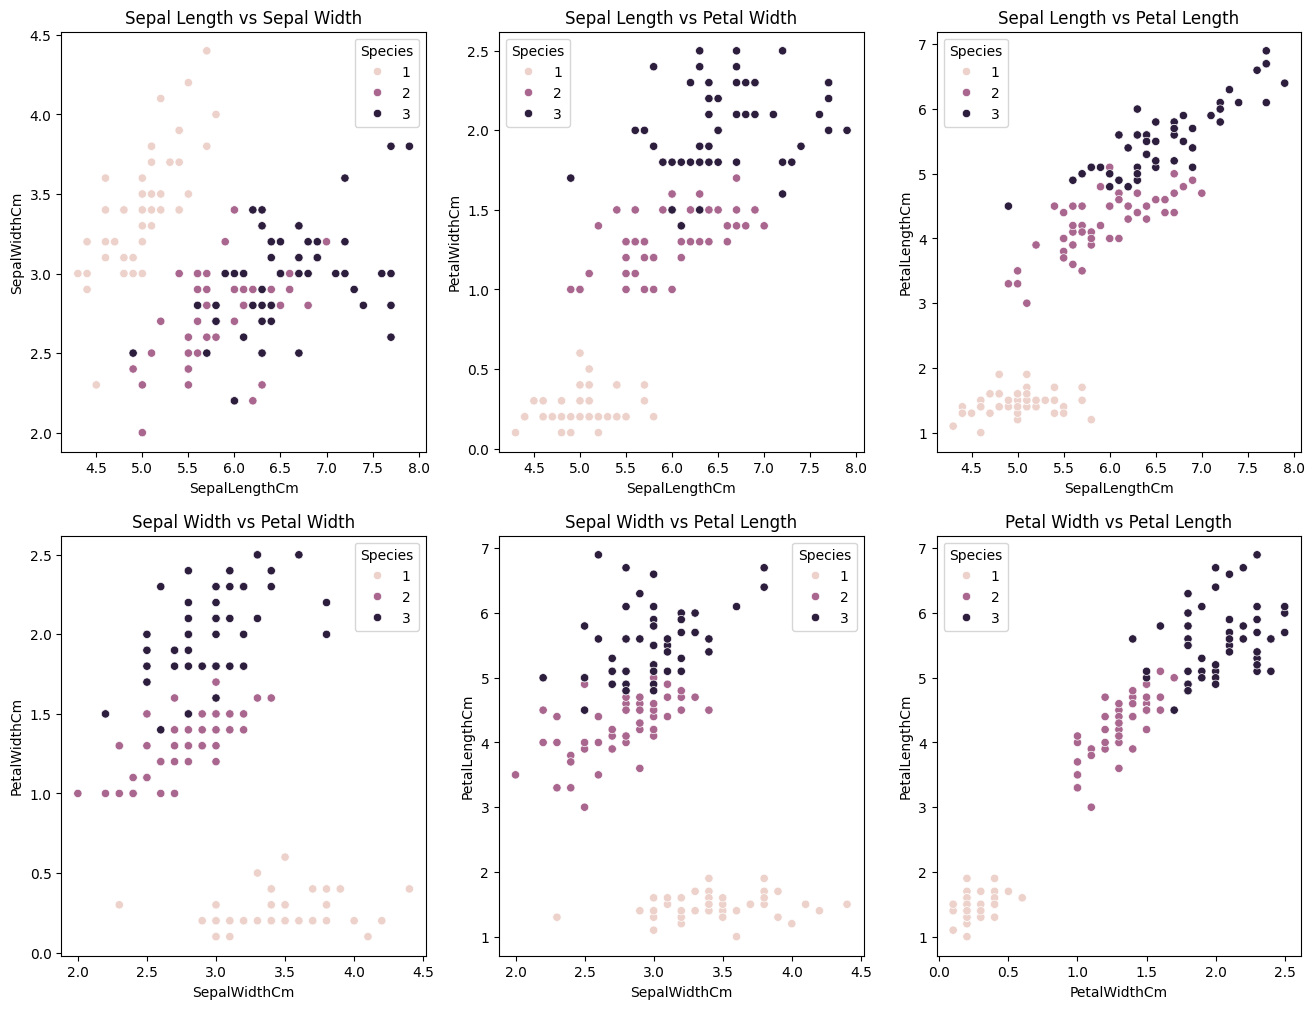

In [41]:
plt.figure(figsize=(16, 12))

plt.subplot(2,3,1)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.title('Sepal Length vs Sepal Width')

plt.subplot(2,3,2)
sns.scatterplot(x='SepalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title('Sepal Length vs Petal Width')

plt.subplot(2,3,3)
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=df)
plt.title('Sepal Length vs Petal Length')

plt.subplot(2,3,4)
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title('Sepal Width vs Petal Width')

plt.subplot(2,3,5)
sns.scatterplot(x='SepalWidthCm', y='PetalLengthCm', hue='Species', data=df)
plt.title('Sepal Width vs Petal Length')

plt.subplot(2,3,6)
sns.scatterplot(x='PetalWidthCm', y='PetalLengthCm', hue='Species', data=df)
plt.title('Petal Width vs Petal Length')
plt.show()

In [46]:
df["Species"] = df["Species"].astype(int)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [48]:
# saving our final cleaned dataset to csv file
df.to_csv("final_iris_dataset.csv")

In [56]:
# now defining the features and target to train our model

x=df.drop(['Species'],axis=1)
y=df['Species'] 

In [57]:
# splitting the training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train) 

KNeighborsClassifier()

In [59]:
KNN_predict = KNN.predict(x_test)

In [64]:
# Evaluating
from sklearn.metrics import accuracy_score, classification_report

KNN_accuracy_score = accuracy_score(y_test, KNN_predict)
KNN_classification_report = classification_report(y_test, KNN_predict)

In [71]:
print("KNN Accuracy Score : ",KNN_accuracy_score)
print()
print("KNN Classification Report : \n", KNN_classification_report)

KNN Accuracy Score :  0.9333333333333333

KNN Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.90      0.90      0.90        10
           3       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [72]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier()
Tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [73]:
Tree_predict = Tree.predict(x_test)

In [74]:
Tree_accuracy_score = accuracy_score(y_test,Tree_predict)
Tree_classification_report = classification_report(y_test, Tree_predict)

In [76]:
print("Tree Accuracy Score : ",Tree_accuracy_score)
print()
print("Tree Classification Report : \n", Tree_classification_report)

Tree Accuracy Score :  0.9666666666666667

Tree Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.90      0.95        10
           3       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [77]:
# SVM
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(x_train,y_train)

SVC()

In [78]:
SVM_predict = SVM.predict(x_test)

In [79]:
SVM_accuracy_score = accuracy_score(y_test, SVM_predict)
SVM_classification_report = classification_report(y_test, SVM_predict)

In [80]:
print("SVM Accuracy Score : ",SVM_accuracy_score)
print()
print("SVM Classification Report : \n", SVM_classification_report)

SVM Accuracy Score :  0.9333333333333333

SVM Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.90      0.90      0.90        10
           3       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [81]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [82]:
NB_predict = NB.predict(x_test)

In [83]:
NB_accuracy_score = accuracy_score(y_test, NB_predict)
NB_classification_report = classification_report(y_test, NB_predict)

In [84]:
print("NB Accuracy Score : ",NB_accuracy_score)
print()
print("NB Classification Report : \n", NB_classification_report)

NB Accuracy Score :  0.9666666666666667

NB Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.91      1.00      0.95        10
           3       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



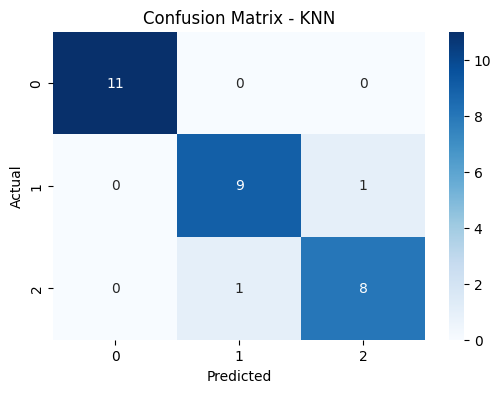

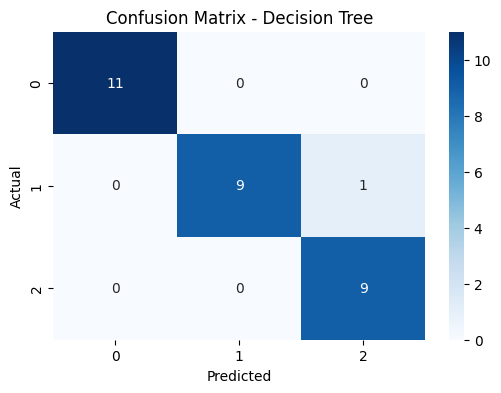

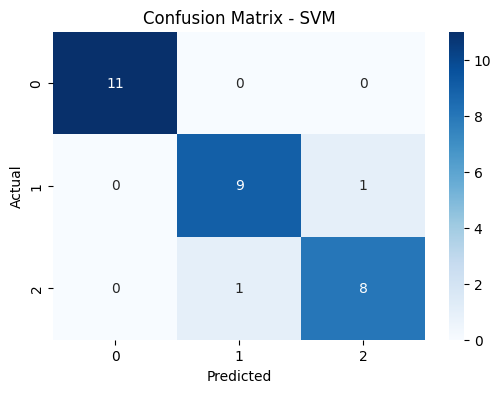

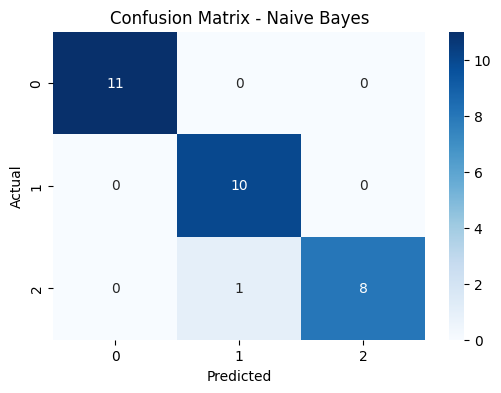

In [88]:
# CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plotting confusion matrices
plot_confusion_matrix(y_test, KNN_predict, "KNN")
plot_confusion_matrix(y_test, Tree_predict, "Decision Tree")
plot_confusion_matrix(y_test, SVM_predict, "SVM")
plot_confusion_matrix(y_test, NB_predict, "Naive Bayes")

 

In [89]:
Report = pd.DataFrame({'Accuracy Score': [KNN_accuracy_score, Tree_accuracy_score, SVM_accuracy_score, NB_accuracy_score]},
                     index=['KNN','Decision Tree', 'SVM', 'Naive Bayes'])

Report

,Accuracy Score
KNN,0.933333
Decision Tree,0.966667
SVM,0.933333
Naive Bayes,0.966667


In [99]:
 # If you prioritize speed and simplicity, and you have a small dataset. Then you should choose Naive Bayes
 # AND from our confusion matrix also we can say Naive Bayes will perform better than Decision tree with our dataset
 
import pickle

pickle.dump(NB, open('NBmodel.pkl','wb'))